# 1. Problem Understanding

The film industry is a high-stakes domain where billions are invested annually in movie production, distribution, and marketing. However, predicting a movie's box office revenue before its release remains a challenging task due to the influence of various complex and interrelated factors such as genre, cast, production budget, and release timing.

## Objective

The main objective of this project is to develop and compare multiple machine learning regression models to accurately predict the box office revenue of a movie using metadata available prior to its release. This includes analyzing the contribution of different features (e.g., budget, cast, genre) and ensuring the model is interpretable and temporally robust.

## Motivation

By solving this problem, the project aims to provide valuable insights for stakeholders such as producers, investors, and marketers, enabling them to:
- Make informed decisions about production and marketing strategies.
- Assess the financial viability of upcoming film projects.
- Allocate resources more efficiently.

## Scope

This project is focused on:
- Using the TMDB 5000 Movie Dataset sourced from Kaggle.
- Treating the task as a regression problem.
- Implementing robust preprocessing and feature engineering techniques.
- Applying and comparing models like Linear Regression, Ridge, Lasso, Random Forest, Gradient Boosting, and XGBoost.
- Ensuring interpretability through SHAP values.
- Avoiding data leakage and considering real-world deployment using a Streamlit app.

## Key Questions

- Which metadata features contribute most significantly to movie revenue?
- Which regression model offers the best predictive performance?
- How can interpretability and model robustness be incorporated into the solution?
- Can the model be reliably used in a production environment for real-time revenue prediction?



# 2. Data Collection and Loading

## Data Source

The dataset used in this project is the **TMDB 5000 Movie Dataset**, available on [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). It contains metadata for over 5,000 movies, including various attributes relevant for predicting box office revenue.

### Files Used:
- `tmdb_5000_movies.csv`: Contains information about each movie, including budget, genres, original language, popularity, production companies, release date, revenue, runtime, spoken languages, and more.
- `tmdb_5000_credits.csv`: Contains information about the cast and crew for each movie, including the director and main actors.



## Loading the Data

The datasets are loaded using `pandas` for inspection and preprocessing:

In [1]:
import pandas as pd

# load datasets
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_5000_credits.csv")

movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [2]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [3]:
print("Movies dataset loaded with columns:", movies.columns)
print("Credits dataset loaded with columns:", credits.columns)

Movies dataset loaded with columns: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Credits dataset loaded with columns: Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


##  Merging Movie and Credits Data

To enrich our dataset with cast and crew information, we merge the two CSV files: `tmdb_5000_movies.csv` and `tmdb_5000_credits.csv`. The common key is:
- `tmdb_5000_movies.id`
- `tmdb_5000_credits.movie_id`

First, we rename `movie_id` to `id` to enable a clean merge. The merged dataset allows us to engineer features from cast and crew data, which may have predictive value for box office revenue.


In [4]:
movies['id'].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: id, dtype: int64

In [5]:
credits['movie_id'].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: movie_id, dtype: int64

In [6]:
# rename the 'movie_id' column in credits to 'id' for merging
credits.rename(columns= {'movie_id': 'id'}, inplace= True)


In [7]:
credits['id'].head()

0     19995
1       285
2    206647
3     49026
4     49529
Name: id, dtype: int64

In [8]:
# Merging Movie and Credits Data on 'id' 
df = movies.merge(credits, on= 'id')

print("Merged DataFrame shape:", df.shape)
df.head()

Merged DataFrame shape: (4803, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
print("Merged DataFrame columns:", df.columns)
df.dtypes

Merged DataFrame columns: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')


budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title_x                  object
vote_average            float64
vote_count                int64
title_y                  object
cast                     object
crew                     object
dtype: object

In [10]:

df.columns.value_counts().sum()

23

# 3. Exploratory Data Analysis (EDA)

The purpose of EDA is to explore the structure, quality, and initial patterns in the dataset. This step helps in understanding the distributions, identifying outliers, detecting data quality issues, and forming hypotheses for model building.


## Dataset Overview

In [11]:
# 1. Drop columns that are not needed
columumns_to_drop = ['title_y', 'title_x', 'homepage', 'overview', 'tagline', 'keywords',
    'spoken_languages', 'id' ]
df.drop(columns= columumns_to_drop, inplace= True)

print("Columns after dropping unnecessary ones:", df.columns)

Columns after dropping unnecessary ones: Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast',
       'crew'],
      dtype='object')


After dropping irrelevant or deferred columns, the dataset now contains **15 columns**, including:

- **3 numeric predictors**:
  - `budget`, `popularity`, `runtime`

- **3 numeric targets/stats**:
  - `revenue`, `vote_average`, `vote_count`

- **9 object/categorical or nested fields**:
  - `genres`, `original_language`, `original_title`, `production_companies`, `production_countries`, `release_date`, `status`, `cast`, `crew`


In [12]:
# 2. Print basic structure
print("Shape: ", df.shape)

df.info()

Shape:  (4803, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   popularity            4803 non-null   float64
 5   production_companies  4803 non-null   object 
 6   production_countries  4803 non-null   object 
 7   release_date          4802 non-null   object 
 8   revenue               4803 non-null   int64  
 9   runtime               4801 non-null   float64
 10  status                4803 non-null   object 
 11  vote_average          4803 non-null   float64
 12  vote_count            4803 non-null   int64  
 13  cast                  4803 non-null   object 
 14  crew                  4803 non-null   object 
dtypes:

- The dataset contains **4,803 rows** and **15 columns**.
- Only **two columns** have missing values:
  - `release_date`: 1 missing
  - `runtime`: 2 missing

In [13]:
# 3. Summary STatistics for Numerical Columns 
print("\nSummary Statistics:")
print(df.describe().T)


Summary Statistics:
               count          mean           std  min           25%  \
budget        4803.0  2.904504e+07  4.072239e+07  0.0  790000.00000   
popularity    4803.0  2.149230e+01  3.181665e+01  0.0       4.66807   
revenue       4803.0  8.226064e+07  1.628571e+08  0.0       0.00000   
runtime       4801.0  1.068759e+02  2.261193e+01  0.0      94.00000   
vote_average  4803.0  6.092172e+00  1.194612e+00  0.0       5.60000   
vote_count    4803.0  6.902180e+02  1.234586e+03  0.0      54.00000   

                       50%           75%           max  
budget        1.500000e+07  4.000000e+07  3.800000e+08  
popularity    1.292159e+01  2.831350e+01  8.755813e+02  
revenue       1.917000e+07  9.291719e+07  2.787965e+09  
runtime       1.030000e+02  1.180000e+02  3.380000e+02  
vote_average  6.200000e+00  6.800000e+00  1.000000e+01  
vote_count    2.350000e+02  7.370000e+02  1.375200e+04  


## 🔹 Summary Statistics Insights

### `budget`
- **Mean**: $29 million
- **Max**: $380 million
- **Min**: **$0**  

---

### `revenue`
- **Mean**: $82 million
- **Max**: $2.78 billion
- **Min**: **$0**  


---

### `popularity`
- **Range**: 0 to 875 (median around 13)  

---

### `runtime`
- **Mean**: ~107 minutes
- **Max**: 338
- **Min**: **0**  


---

### `vote_average` and `vote_count`
- Some movies have **zero votes**.
- Others have **extremely high vote counts**.

In [14]:
# Count rows with zero budget, revenue, or runtime
print("Zero budget:", (df['budget'] == 0).sum())
print("Zero revenue:", (df['revenue'] == 0).sum())
print("Zero runtime:", (df['runtime'] == 0).sum())

Zero budget: 1037
Zero revenue: 1427
Zero runtime: 35


In [15]:
# 4. Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
missing_percent = df.isnull().mean().sort_values(ascending= False) * 100
print("\nMissing Value Percentage:")
print(missing_percent[missing_percent > 0 ])

Missing values in each column:
budget                  0
genres                  0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
status                  0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

Missing Value Percentage:
runtime         0.041641
release_date    0.020820
dtype: float64


## Missing Values Summary

The dataset has a **very low percentage of missing data**:

| Column         | Missing | % Missing |
|----------------|---------|-----------|
| `runtime`      | 2       | 0.0416%   |
| `release_date` | 1       | 0.0208%   |

These are negligible and can be handled with simple imputation or row removal without biasing the dataset.

---

## Action Plan

### 1. `runtime` (2 missing)
- Numeric, continuous
- Low missing rate → **Impute with median**

### 2. `release_date` (1 missing)
- Used for extracting `year`, `month`, `season`
- Very low impact → **Drop the row**

---

## Decision:
We will:
- Impute `runtime` with median
- Drop the single row with missing `release_date`

In [16]:
df["runtime"].head()

0    162.0
1    169.0
2    148.0
3    165.0
4    132.0
Name: runtime, dtype: float64

In [17]:
missing_runtime = df[df['runtime'].isnull()]
missing_runtime

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,cast,crew
2656,15000000,"[{""id"": 18, ""name"": ""Drama""}]",it,Chiamatemi Francesco - Il Papa della gente,0.738646,"[{""name"": ""Taodue Film"", ""id"": 45724}]","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}]",2015-12-03,0,NaN,Released,7.3,12,"[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de..."
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",en,"To Be Frank, Sinatra at 100",0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,Released,0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


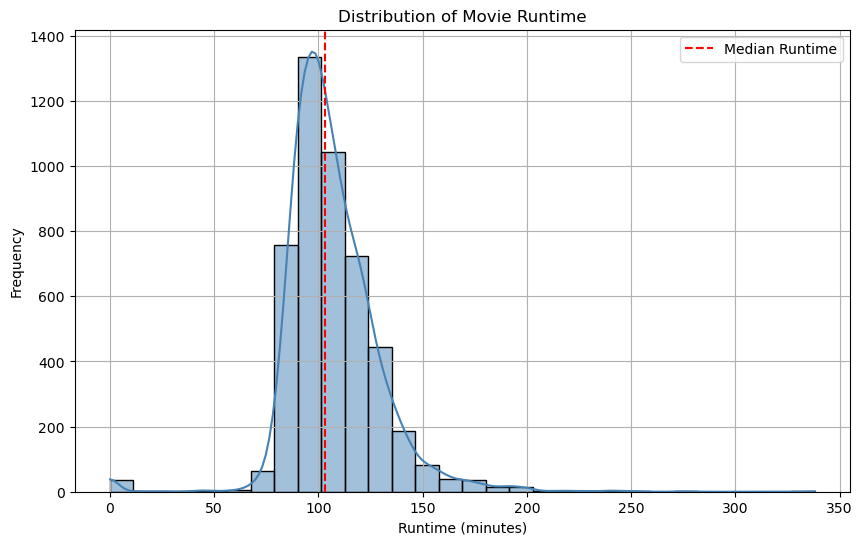

In [18]:
# Runtime Histogram Code
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'], bins= 30, kde= True, color='steelblue')
plt.title('Distribution of Movie Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.axvline(df['runtime'].median(), color='red', linestyle='--', label='Median Runtime')
plt.grid(True)
plt.legend()
plt.show()


The distribution of the movie runtime is skewed to the right hence filling the missing value with medium works

In [19]:
# Impute missing runtime with median
median_runtime = df['runtime'].median()
df['runtime'].fillna(median_runtime, inplace=True)
df['runtime'].isnull().sum()  # Should be 0 after imputation

C:\Users\HomePC\AppData\Local\Temp\ipykernel_7236\3062105754.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['runtime'].fillna(median_runtime, inplace=True)


0

In [20]:
missing_release = df[df['release_date'].isnull()]
missing_release

,budget,genres,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,status,vote_average,vote_count,cast,crew
4553,0,[],en,America Is Still the Place,0.0,[],[],NaN,0,0.0,Released,0.0,0,[],[]


we will drop the single row with the missing date entry


In [21]:
# Drop row with missing release_date
df = df[df['release_date'].notnull().copy()]
df.isnull().sum()

budget                  0
genres                  0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
status                  0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [22]:
# 5. Function to display unique values for each object (categorical) column
def unique_values(df, max_unique= 25):
    object_col = df.select_dtypes(include= "object").columns
    for col in object_col:
        unique_vals = df[col].nunique()
        print(f"\n'{col}' - {unique_vals} unique values")
        if unique_vals <= max_unique:
            print(df[col].unique())
        else:
            print(f"Too many to display (> {max_unique})")

unique_values(df)


'genres' - 1175 unique values
Too many to display (> 25)

'original_language' - 37 unique values
Too many to display (> 25)

'original_title' - 4800 unique values
Too many to display (> 25)

'production_companies' - 3697 unique values
Too many to display (> 25)

'production_countries' - 469 unique values
Too many to display (> 25)

'release_date' - 3280 unique values
Too many to display (> 25)

'status' - 3 unique values
['Released' 'Post Production' 'Rumored']

'cast' - 4761 unique values
Too many to display (> 25)

'crew' - 4776 unique values
Too many to display (> 25)


In [23]:
df.dtypes

budget                    int64
genres                   object
original_language        object
original_title           object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
status                   object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
dtype: object

# Target Variable: Revenue Distribution

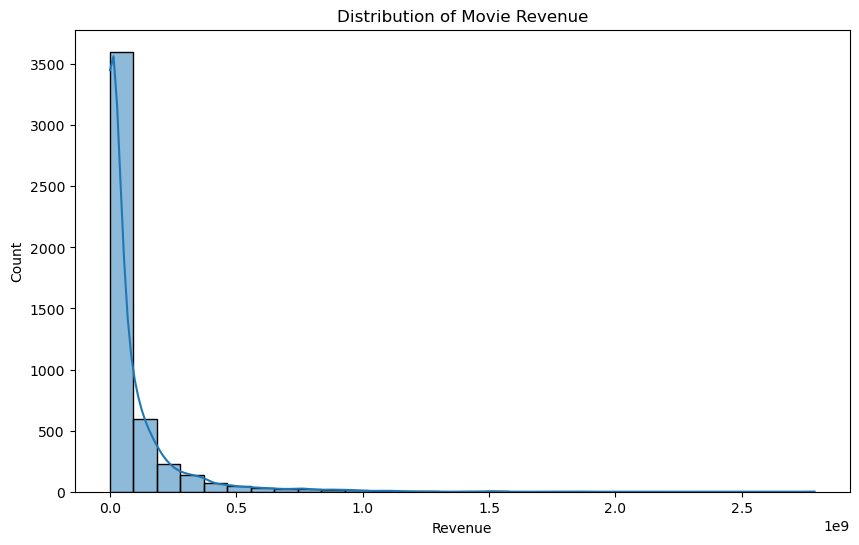

In [24]:
# plotting the distribution of the target variable 'revenue'
plt.figure(figsize=(10, 6))
sns.histplot(df['revenue'], bins= 30, kde= True)
plt.title('Distribution of Movie Revenue')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()


revenue is heavily skewed to the right

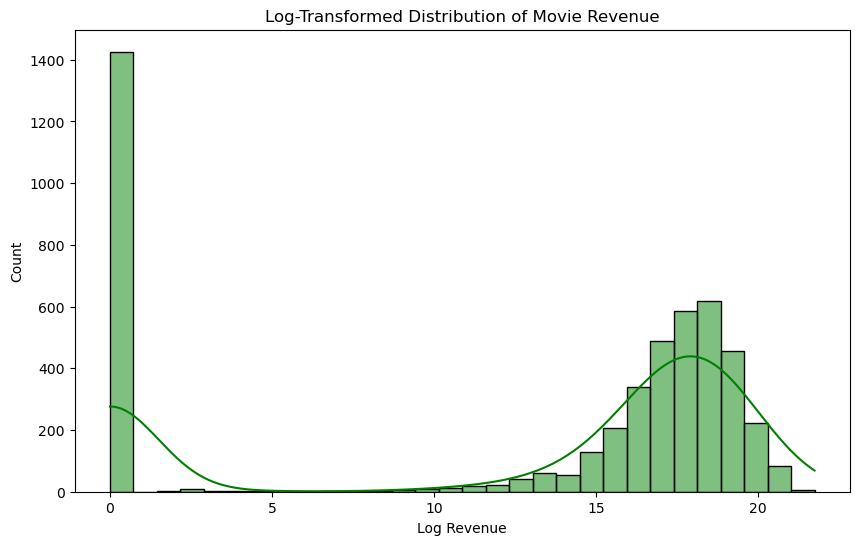

In [25]:
import numpy as np
# log transformation of revenue
df['log_revenue'] = np.log1p(df['revenue'])

plt.figure(figsize=(10, 6))
sns.histplot(df['log_revenue'], bins= 30, kde= True, color= 'green')
plt.title('Log-Transformed Distribution of Movie Revenue')
plt.xlabel('Log Revenue')
plt.ylabel('Count')
plt.show()

An improvement in the distribution wuth the lower values more dominant

# 🎬 Interpretation of Log-Transformed Movie Revenue Distribution

## 🔍 Overview
The histogram displays the **log-transformed distribution of movie revenue** for over 4,800 films. The original revenue values were highly **right-skewed**, meaning a small number of movies earned massive box office returns, while most earned relatively little. To address this skew and make the data more analyzable, a **natural logarithmic transformation** was applied to the `revenue` column.

---

## 📈 Why Log Transform?
- **Revenue is right-skewed**: A few blockbusters earn hundreds of millions or even billions, pulling the distribution far to the right.
- **Log transformation compresses extreme values**, spreading the lower values apart and pulling in the long tail — making the distribution more symmetric.
- This transformation makes it easier to apply models (like linear regression) that assume **normality** or **homoscedasticity** (constant variance).

> ℹ️ The log function used is `ln(x)` or `log(x + 1)` to handle zero revenue values.

---

## 📊 Key Observations in the Plot

### 1. **Bimodal Distribution**
- The histogram shows **two clear peaks**, suggesting a **bimodal** pattern:
  - **Peak 1 (Log Revenue ≈ 0–1)**:
    - Represents movies with very low or zero revenue.
    - Includes flops, limited releases, or missing/incomplete revenue data.
  - **Peak 2 (Log Revenue ≈ 17–19)**:
    - Represents commercially successful films — moderate to high earners.
    - This peak is broader and somewhat bell-shaped, indicating natural variation among successful films.

### 2. **Low Density Zone (Log Revenue ≈ 5–15)**
- There's a **notable dip** in this mid-range revenue zone.
- Suggests relatively few movies fall in the "middle class" of box office earnings.
- Could reflect a "barbell" distribution in the industry: **very successful** vs. **very unsuccessful** films, with fewer in between.

### 3. **KDE Curve**
- The green **Kernel Density Estimate** visually emphasizes the bimodal nature of the data, smoothing out the histogram to reveal underlying trends.

---

# Key Numeric Predictors
We visualize the relationships between revenue and key numeric features:

budget

popularity

runtime

vote_average

vote_count

In [26]:
df.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast',
       'crew', 'log_revenue'],
      dtype='object')

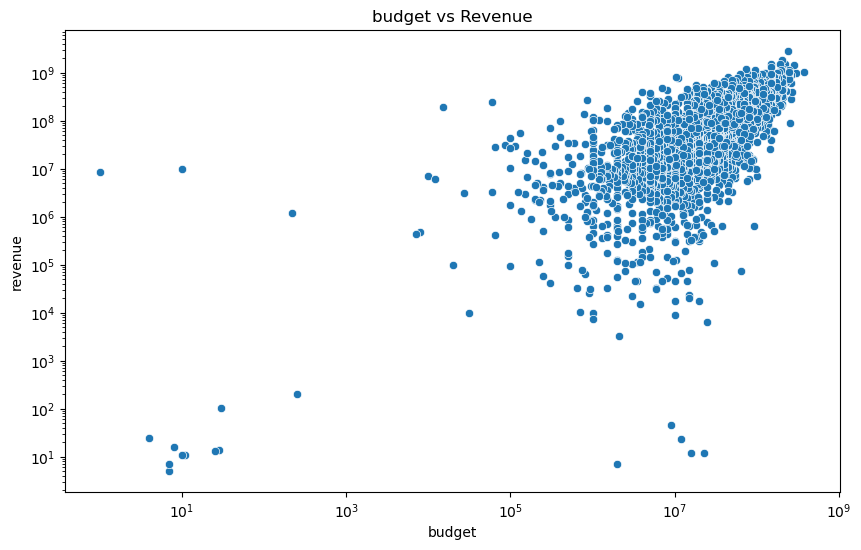

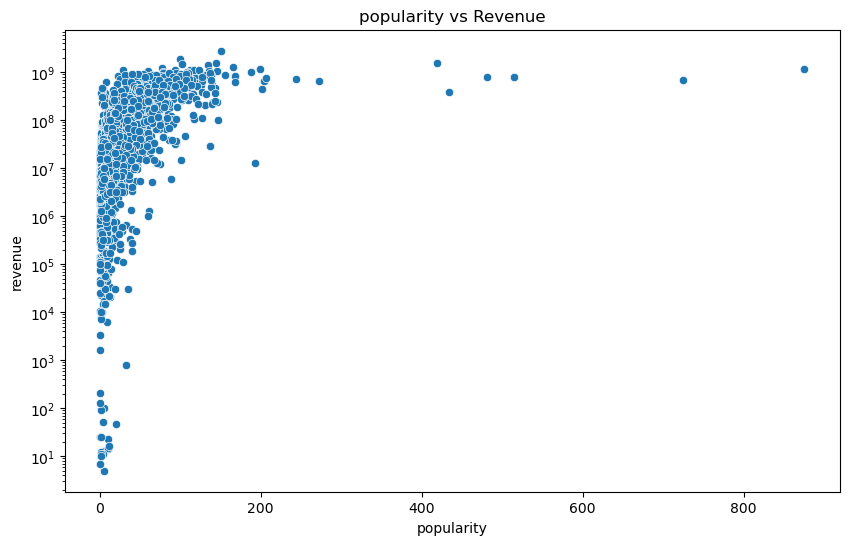

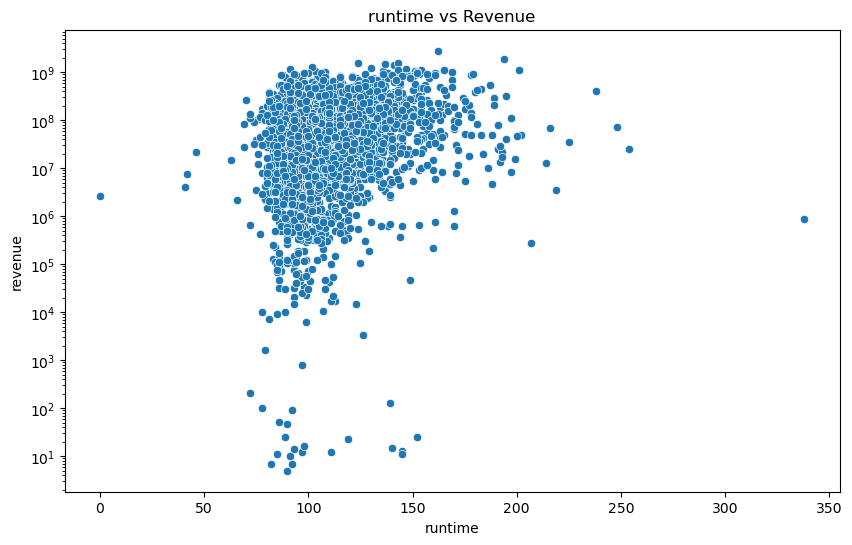

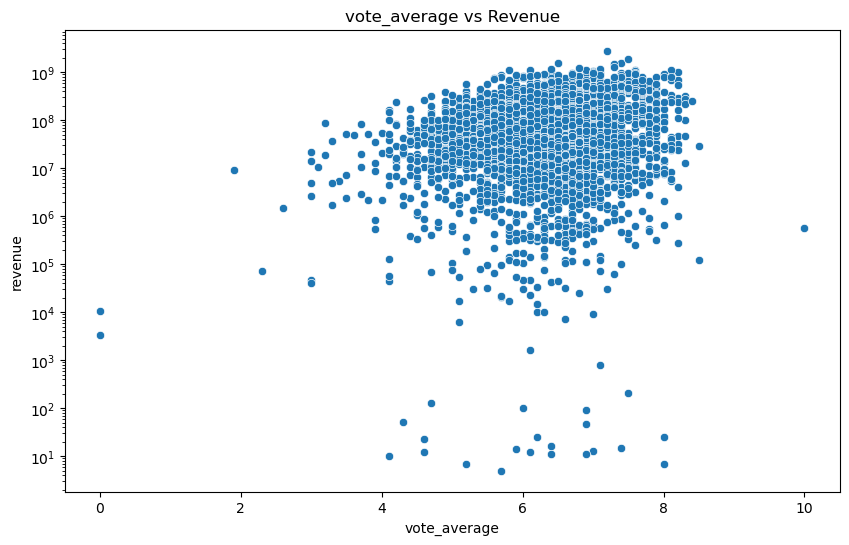

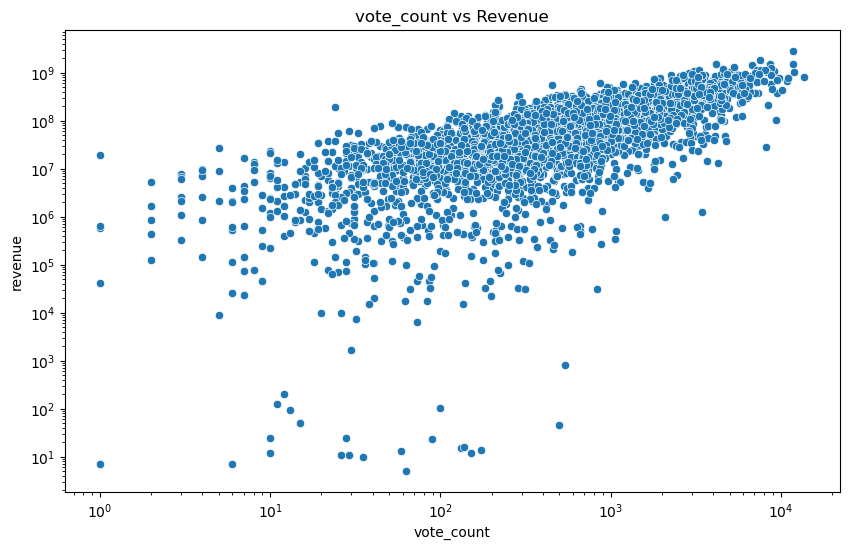

In [27]:
numeric_columns = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count']

for feature in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data= df, x= feature, y= 'revenue')
    plt.title(f'{feature} vs Revenue')
    plt.xscale('log') if feature in ['budget', 'vote_count'] else None
    plt.yscale('log')
    plt.show()

# 📊 Relationship Between Numerical Features and Revenue

The scatterplots below illustrate how key numerical features relate to `revenue`, after applying log scaling (where appropriate) to handle skew and improve interpretability.

---

## 1. **Budget vs Revenue**
- **Observation**: There is a clear **positive correlation** between budget and revenue.
- **Interpretation**: As production budget increases, revenue also tends to increase. This aligns with the expectation that larger budgets often support better marketing, bigger stars, and wider releases.
- **Caveat**: Some high-budget films still result in low revenue — possibly flops or delayed releases.

---

## 2. **Popularity vs Revenue**
- **Observation**: Interestingly, many movies with **lower popularity scores** still report **high revenue**.
- **Interpretation**: Popularity (as defined in the TMDB dataset) might not be a direct proxy for box office success. It could be influenced by user activity or recent interest rather than actual performance.
- **Note**: There appears to be a weak or **non-linear** relationship overall.

---

## 3. **Runtime vs Revenue**
- **Observation**: Revenue tends to be highest for movies with **runtimes between 100 and 200 minutes**.
- **Outliers**: A few unusually long movies (~350 mins) appear as outliers with modest revenue.
- **Interpretation**: While longer runtimes may indicate epic or high-production-value films, excessively long durations could limit theatrical showings and reduce revenue.

---

## 4. **Vote Average vs Revenue**
- **Observation**: A general **positive trend** is visible — higher vote averages are associated with higher revenue.
- **Interpretation**: Critically acclaimed or well-reviewed films are more likely to attract larger audiences, leading to stronger box office returns.
- **Limitation**: There is some noise — not all highly rated movies are top earners.

---

## 5. **Vote Count vs Revenue**
- **Observation**: There is a **strong positive relationship** between vote count and revenue.
- **Interpretation**: Movies with more votes are generally more widely seen, suggesting that vote count can act as a proxy for audience size and commercial exposure.

---

## ✅ Summary

| Feature         | Correlation with Revenue | Notes                                                  |
|----------------|---------------------------|--------------------------------------------------------|
| Budget          | Strong Positive           | More budget generally = more revenue                  |
| Popularity      | Weak/No Clear Pattern     | Some high earners have low popularity                 |
| Runtime         | Positive (100–200 mins)   | Optimal zone exists; outliers beyond 3 hours          |
| Vote Average    | Moderate Positive         | Higher rated films tend to earn more                  |
| Vote Count      | Strong Positive           | High vote count strongly aligned with revenue         |



# Categorical Features

In [28]:

df.dtypes

budget                    int64
genres                   object
original_language        object
original_title           object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
status                   object
vote_average            float64
vote_count                int64
cast                     object
crew                     object
log_revenue             float64
dtype: object

In [29]:

df.release_date.head()

0    2009-12-10
1    2007-05-19
2    2015-10-26
3    2012-07-16
4    2012-03-07
Name: release_date, dtype: object

In [30]:
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df.release_date, errors='coerce')
df['release_year'] = df.release_date.dt.year
df['release_month'] = df.release_date.dt.month



In [31]:

df.genres.head()

0    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1    [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4    [{"id": 28, "name": "Action"}, {"id": 12, "nam...
Name: genres, dtype: object

In [32]:
import ast
# Top genres extraction

df['genres_list'] = df['genres'].apply(lambda x: [i['name'] for i in ast.literal_eval(x)] if pd.notnull(x) else [])
df['main_genre'] = df['genres_list'].apply(lambda x: x[0] if len(x) > 0 else 'Unknown')



In [33]:
df.genres_list.head()

0    [Action, Adventure, Fantasy, Science Fiction]
1                     [Adventure, Fantasy, Action]
2                       [Action, Adventure, Crime]
3                 [Action, Crime, Drama, Thriller]
4             [Action, Adventure, Science Fiction]
Name: genres_list, dtype: object

In [34]:

df.main_genre.head()

0       Action
1    Adventure
2       Action
3       Action
4       Action
Name: main_genre, dtype: object

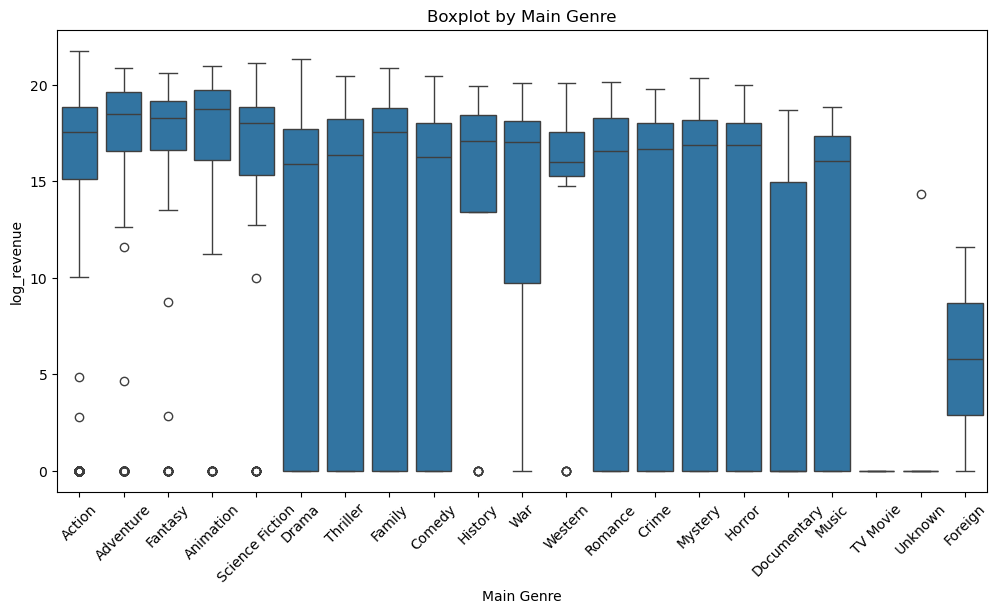

In [35]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='main_genre', y='log_revenue')
plt.xticks(rotation= 45)
plt.title('Boxplot by Main Genre')
plt.xlabel('Main Genre')
plt.show()


In [36]:
df.original_language.value_counts()

original_language
en    4504
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

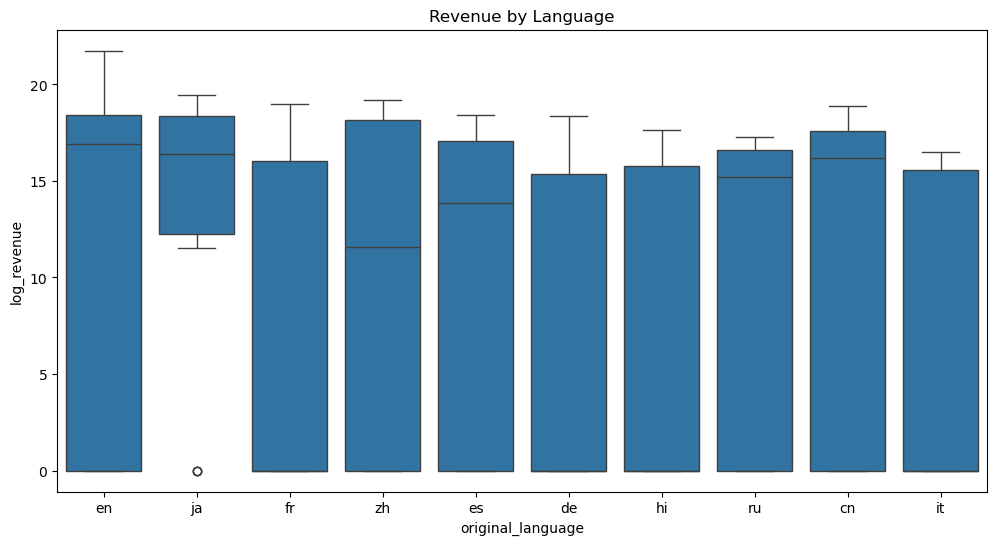

In [37]:
plt.figure(figsize=(12, 6))
top_lang = df['original_language'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['original_language'].isin(top_lang)], x='original_language', y='log_revenue')
plt.title('Revenue by Language')
plt.show()


## 🎬 Genre-wise Revenue Interpretation

- **Action, Adventure, Fantasy, and Science Fiction** genres tend to yield the highest revenue.  
- **TV Movie** and **Unknown** categories show **minimal profitability**.
- **Foreign** films generally have **lower revenue**, although there are a few **notable outliers** with high returns.

## 🌍 Language-wise Revenue Interpretation

- **English** is overwhelmingly the **dominant language** in terms of revenue, reflecting its global cinematic influence.
- Other high-performing languages include **Chinese**, **Japanese**, and **French**, but they lag far behind English in terms of overall market share and revenue potential.


In [38]:
df.columns

Index(['budget', 'genres', 'original_language', 'original_title', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'vote_average', 'vote_count', 'cast',
       'crew', 'log_revenue', 'release_year', 'release_month', 'genres_list',
       'main_genre'],
      dtype='object')

In [39]:
df[['log_revenue', 'revenue']].head()

,log_revenue,revenue
0,21.748578,2787965087
1,20.683485,961000000
2,20.596199,880674609
3,20.804790,1084939099
4,19.464974,284139100


In [42]:
# Add log_budget column
df['log_budget'] = np.log1p(df['budget'])
df[['log_budget', 'budget']].head()

,log_budget,budget
0,19.283571,237000000
1,19.519293,300000000
2,19.316769,245000000
3,19.336971,250000000
4,19.376192,260000000


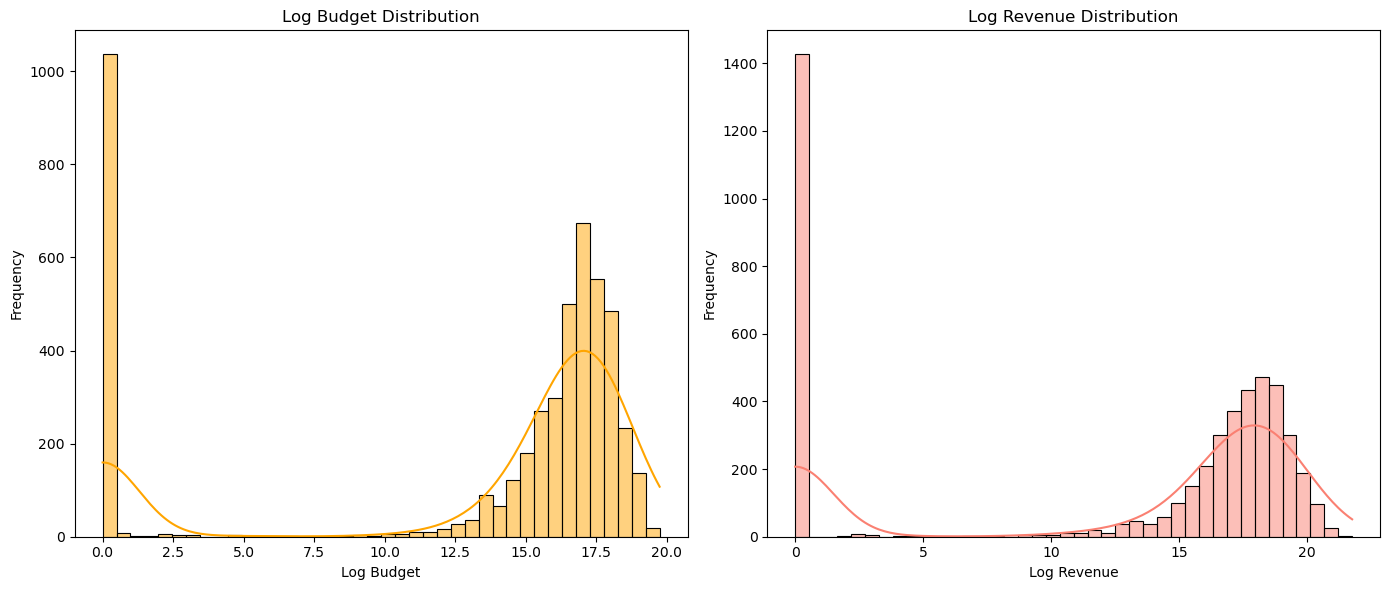

In [43]:
plt.figure(figsize= (14, 6))

# histogram of log_budget
plt.subplot(1, 2, 1)
sns.histplot(df.log_budget, bins= 40, kde= True, color='orange')
plt.title('Log Budget Distribution')
plt.xlabel('Log Budget')
plt.ylabel('Frequency')

# histogram of log_revenue
plt.subplot(1, 2, 2)
sns.histplot(df.log_revenue, bins= 40, kde= True, color='salmon')
plt.title('Log Revenue Distribution')
plt.xlabel('Log Revenue')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

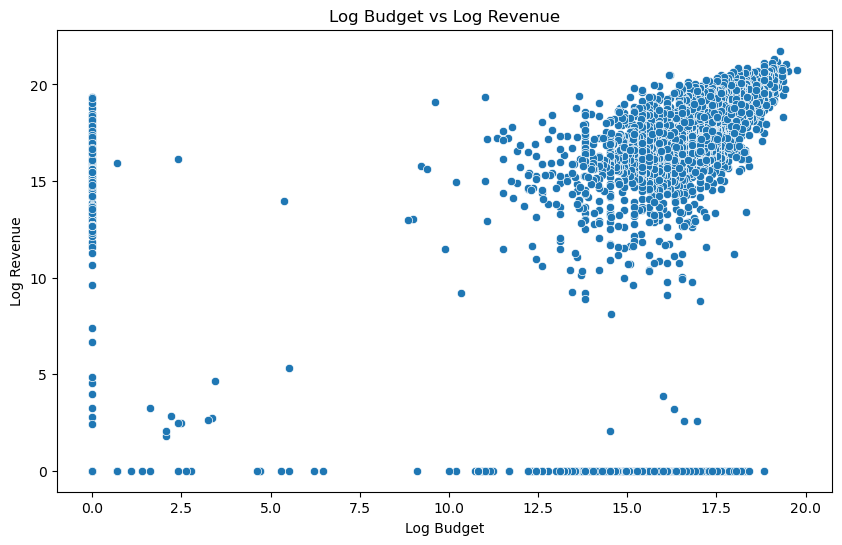

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log_budget', y='log_revenue')
plt.title('Log Budget vs Log Revenue')
plt.xlabel('Log Budget')
plt.ylabel('Log Revenue')
plt.show()

### Interpretation: `log_budget` vs `log_revenue` Distributions

Both histograms reflect a **"winner-take-all"** or **blockbuster-driven** pattern in the film industry:

- A **large number of films** are produced with **very low budgets** and yield **minimal revenue** — this forms the **first peak** in the distributions.
- A **smaller but crucial segment** of films receive **higher budgets** and generate **substantially more revenue**, forming a **second peak**.
- This **bimodal distribution** highlights the industry’s **dependency on a few blockbuster hits** to drive profitability — a small percentage of films dominate box office returns.
- A scatter plot for budget against revenue also supports this showing how as the budget increases, the revenue also increases

Correlation Matrix (Pearson)

To understand how key numeric features relate to each other and to `log_revenue`, we will compute a **Pearson correlation matrix**.

🧮 Features Included:
- `budget`
- `popularity`
- `runtime`
- `vote_average`
- `vote_count`
- `log_budget`
- `log_revenue`


In [47]:
df.dtypes

budget                           int64
genres                          object
original_language               object
original_title                  object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
status                          object
vote_average                   float64
vote_count                       int64
cast                            object
crew                            object
log_revenue                    float64
release_year                     int32
release_month                    int32
genres_list                     object
main_genre                      object
log_budget                     float64
dtype: object

In [51]:
features = ['log_budget', 'popularity', 'runtime', 'vote_average', 'vote_count', 'log_revenue']
corr_matrix = df[features].corr(method= 'pearson').round(2)
corr_matrix

,log_budget,popularity,runtime,vote_average,vote_count,log_revenue
log_budget,1.00,0.33,0.25,0.21,0.32,0.70
popularity,0.33,1.00,0.23,0.27,0.78,0.41
runtime,0.25,0.23,1.00,0.37,0.27,0.27
vote_average,0.21,0.27,0.37,1.00,0.31,0.29
vote_count,0.32,0.78,0.27,0.31,1.00,0.41
log_revenue,0.70,0.41,0.27,0.29,0.41,1.00


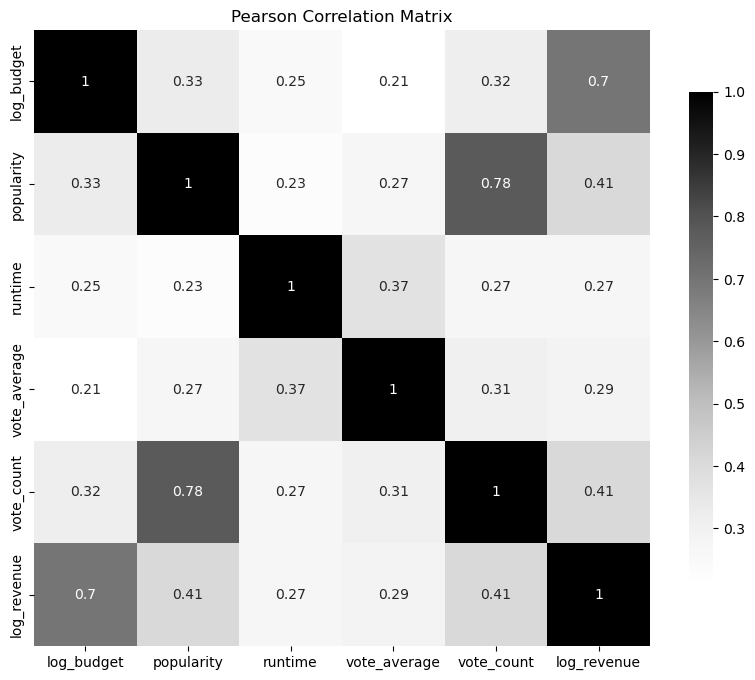

In [61]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot= True, cmap= 'Greys', square= True, cbar_kws= {'shrink': 0.8})
plt.title("Pearson Correlation Matrix")
plt.show()

## Correlation Matrix Interpretation

The Pearson correlation matrix reveals the following key insights:

- `log_budget` shows the **strongest positive correlation** with `log_revenue` (**r = 0.70**), confirming the intuitive link between higher budgets and higher revenues.
- `vote_count` and `popularity` are **moderately correlated** with revenue (both **r ≈ 0.41**), reflecting how audience reach and engagement relate to earnings.
- `runtime` and `vote_average` show **weaker but still positive relationships** with `log_revenue`, suggesting some influence but likely indirect.
- Strong inter-feature correlation is also noted between `vote_count` and `popularity` (**r = 0.78**), potentially indicating multicollinearity risk during modeling.


In [63]:
df[['vote_average', 'vote_count', 'popularity']].head()

,vote_average,vote_count,popularity
0,7.2,11800,150.437577
1,6.9,4500,139.082615
2,6.3,4466,107.376788
3,7.6,9106,112.312950
4,6.1,2124,43.926995


# drop one
